<a href="https://colab.research.google.com/github/GustavoRuizC/Reconocimiento_Facial_usando_PCA_y_LDA/blob/main/Reconocimiento_Facial_usando_PCA_y_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACIAL RECOGNITION USING PCA and LDA TECHNIQUES ON MODELS [SVC AND KNN].



In this notebook we explore the face recognition problem using the Labeled Faces in the Wild (LFW) dataset, available in sklearn via the fetch_lfw_people function. This dataset contains images of faces of public figures, mainly captured in informal contexts, making it an interesting challenge for classification and recognition tasks.

**Objectives.**\
Apply dimensionality reduction techniques such as PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) to extract relevant features from images.

* Evaluate the performance of different classifiers, in particular:

  * Support Vector Machines (SVC).

  * K-Nearest Neighbors (KNN)

**NOTE: This notebook seeks to illustrate how dimensionality reduction techniques can facilitate the training of efficient models in high dimensional problems such as face recognition.**



---



## Facial Recognition using dimensionality reduction (PCA, LDA) and Supervised Machine Learning Models

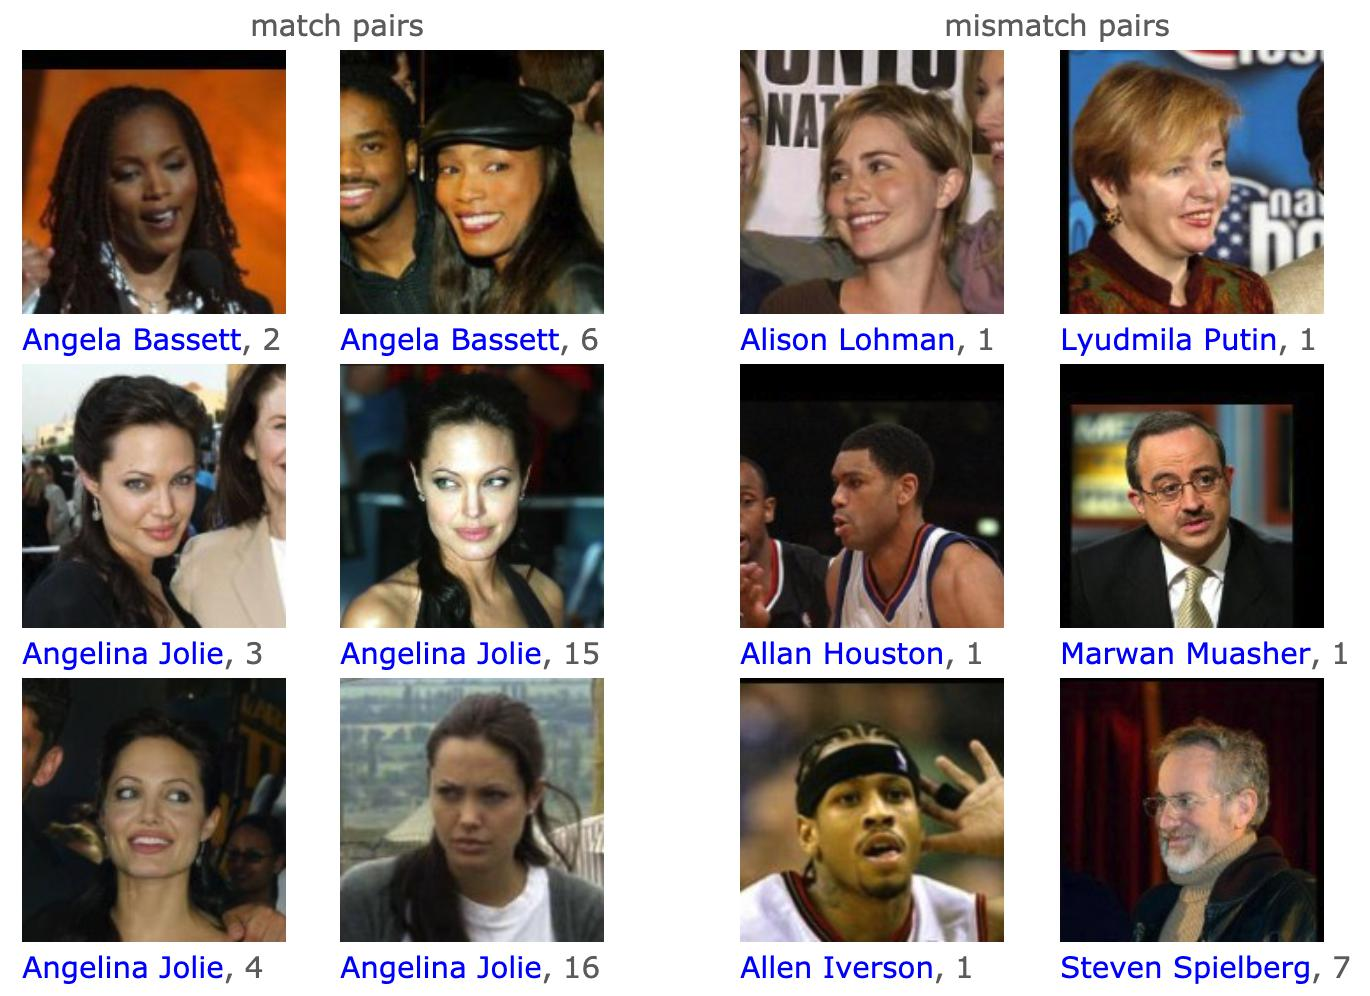

importing the data and display some images of faces

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import time


Loading the dataset LFW (Labeled Faces in the Wild)

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
print(faces.data.shape)

(1348, 2914)


Checking the description of the dataset

In [ ]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

Some sample images are shown below

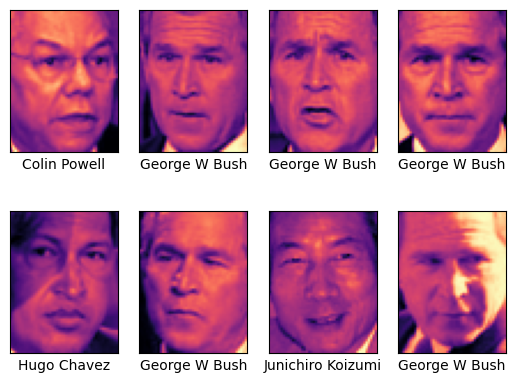

In [ ]:
fig, splts = plt.subplots(2, 4)
for i, splt in enumerate(splts.flat):
    splt.imshow(faces.images[i], cmap='magma')
    splt.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

Assign input data (X) and output tags (y)

In [ ]:
X = faces.data
y = faces.target
target_names = faces.target_names


## Preparing the data to train the model. Perform holdout.

### Parte A

For this exercise, we will use as an example only 150 components for PCA and LDA stored in a random state of 42.

Revisa la documentación en https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Scaling and applying PCA Performing holdout.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=150, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# SIN APLICAR ESCALA  solo PCA
pca = PCA(n_components=150, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Training two classification models. SVM (SVC) and KNN

In [ ]:
modelos = {
    "SVC" : SVC(kernel='linear', C=1.0, random_state=42), #SOFT
    "KNN" : KNeighborsClassifier(n_neighbors=5)
}

Evaluating the model

In [ ]:
results = {}
prediccion = []
for name, model in modelos.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    prediccion.append((name, y_pred))  # Save name of the model and its predictions # saved in tuples within a list

    train_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy
        #'train_time': train_time,
        #'report': classification_report(y_test, y_pred, target_names=target_names)
    }

In [ ]:
print(results)

{'SVC': {'accuracy': 0.7851851851851852}, 'KNN': {'accuracy': 0.5592592592592592}}


In [ ]:
print(prediccion)

[('SVC', array([3, 0, 3, 6, 6, 1, 7, 3, 3, 1, 3, 3, 4, 3, 2, 1, 3, 2, 1, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 7, 1,
       3, 3, 0, 1, 1, 2, 7, 3, 4, 6, 7, 3, 7, 1, 7, 0, 4, 3, 4, 2, 5, 4,
       7, 3, 4, 3, 1, 3, 4, 1, 3, 4, 0, 4, 3, 3, 3, 3, 1, 0, 7, 3, 3, 2,
       7, 0, 1, 1, 2, 3, 3, 7, 7, 3, 3, 3, 3, 7, 1, 5, 3, 3, 0, 3, 7, 3,
       3, 1, 0, 2, 3, 3, 3, 3, 4, 4, 7, 7, 5, 3, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 1, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 4, 1,
       7, 1, 3, 4, 1, 4, 6, 1, 7, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 1, 0, 0, 1, 1, 7, 1, 3, 5, 3, 7, 3, 3, 4, 4, 6, 3, 7, 3,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 3, 1, 6, 3,
       1, 3, 1, 7, 7, 2, 7, 7, 5, 4, 1, 3, 3, 4, 3, 4, 7, 3, 3, 1, 3, 7,
       7, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 7, 4, 3, 7,
       3, 1, 3, 1, 3, 3])), ('KNN', array([0, 3, 3, 2, 6, 1, 3, 3, 3, 3, 3, 3, 7, 3, 3, 1, 7, 0, 2, 1, 3, 7,
      

The following code block allows us to see what the original class was and what the model prediction was.


In [ ]:
#KNN
incorrect = 0
total = len(prediccion[1][1])  # Get length of predictions for the second model (KNN is at index 1)

print("\nActual\t\t\Predicción\n")

for i in range(total):
    actual_name = faces.target_names[y_test[i]]
    predicted_name = faces.target_names[prediccion[1][1][i]] # Access predictions for second model (KNN)

    if prediccion[1][1][i] != y_test[i]:  # Access predictions for second model (KNN) for comparison
        incorrect += 1
        print(f"{actual_name}\t\t\t{predicted_name}")

print(f"\n{total - incorrect} clasificaciones correctas y {incorrect} incorrectas.")


Actual		\Predicción

George W Bush			Ariel Sharon
Gerhard Schroeder			George W Bush
Junichiro Koizumi			Donald Rumsfeld
Colin Powell			George W Bush
Ariel Sharon			Tony Blair
Donald Rumsfeld			Ariel Sharon
George W Bush			Donald Rumsfeld
Donald Rumsfeld			Colin Powell
Tony Blair			George W Bush
George W Bush			Tony Blair
Hugo Chavez			George W Bush
Ariel Sharon			George W Bush
George W Bush			Gerhard Schroeder
George W Bush			Donald Rumsfeld
Tony Blair			Gerhard Schroeder
Hugo Chavez			George W Bush
Donald Rumsfeld			Ariel Sharon
Tony Blair			George W Bush
Hugo Chavez			George W Bush
George W Bush			Colin Powell
Tony Blair			Colin Powell
Gerhard Schroeder			George W Bush
Donald Rumsfeld			George W Bush
Gerhard Schroeder			Donald Rumsfeld
Donald Rumsfeld			George W Bush
Hugo Chavez			Colin Powell
Gerhard Schroeder			Colin Powell
Colin Powell			Gerhard Schroeder
Hugo Chavez			George W Bush
Gerhard Schroeder			George W Bush
George W Bush			Donald Rumsfeld
Donald Rumsfeld			Colin Powell
D

In [ ]:
#SVC
incorrect = 0
total = len(prediccion[0][1])  # Get length of predictions for the first model

print("\nActual\t\t\Predicción\n")

for i in range(total):
    actual_name = faces.target_names[y_test[i]]
    predicted_name = faces.target_names[prediccion[0][1][i]] # Access predictions for first model

    if prediccion[0][1][i] != y_test[i]:  # Access predictions for first model for comparison
        incorrect += 1
        print(f"{actual_name}\t\t\t{predicted_name}")

print(f"\n{total - incorrect} clasificaciones correctas y {incorrect} incorrectas.")


Actual		\Predicción

Gerhard Schroeder			Ariel Sharon
George W Bush			Tony Blair
Ariel Sharon			Gerhard Schroeder
George W Bush			Donald Rumsfeld
Tony Blair			George W Bush
George W Bush			Colin Powell
George W Bush			Tony Blair
Donald Rumsfeld			George W Bush
George W Bush			Donald Rumsfeld
Hugo Chavez			Ariel Sharon
Hugo Chavez			Gerhard Schroeder
Donald Rumsfeld			George W Bush
Hugo Chavez			Gerhard Schroeder
George W Bush			Tony Blair
Donald Rumsfeld			George W Bush
Colin Powell			Ariel Sharon
George W Bush			Colin Powell
Tony Blair			George W Bush
Colin Powell			Tony Blair
George W Bush			Colin Powell
Gerhard Schroeder			Hugo Chavez
Tony Blair			Donald Rumsfeld
Tony Blair			George W Bush
Colin Powell			George W Bush
Donald Rumsfeld			George W Bush
Tony Blair			Gerhard Schroeder
Donald Rumsfeld			George W Bush
George W Bush			Donald Rumsfeld
George W Bush			Colin Powell
George W Bush			Colin Powell
Colin Powell			Gerhard Schroeder
Tony Blair			Gerhard Schroeder
Colin Powell			Tony

Applying the confusion matrix


Matriz de confusión:


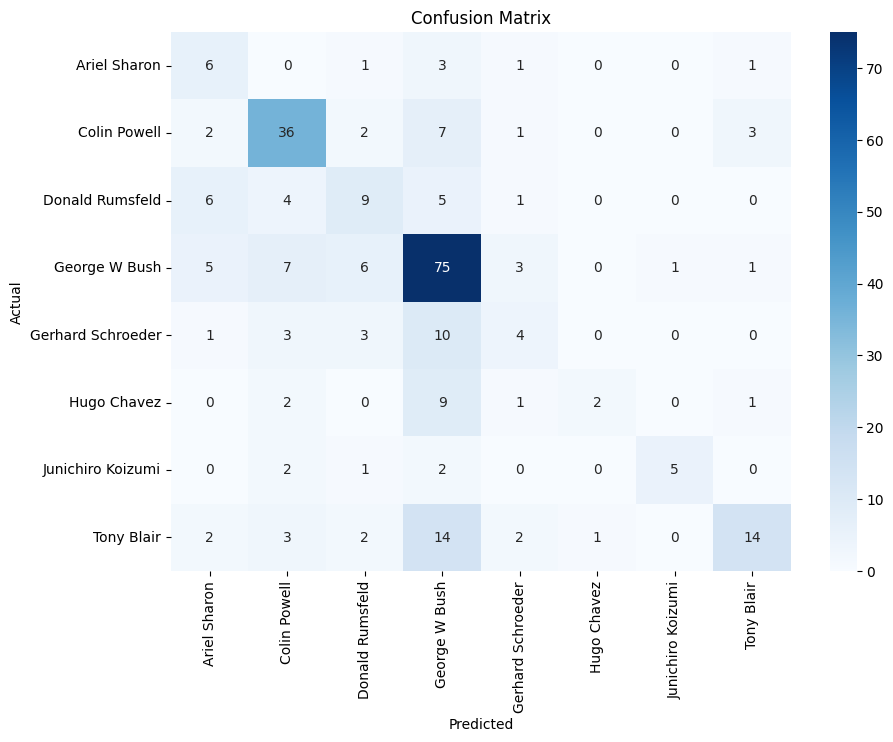

In [ ]:
# KNN
matrix = confusion_matrix(y_test, prediccion[1][1])
print("\nMatriz de confusión:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Matriz de confusión:


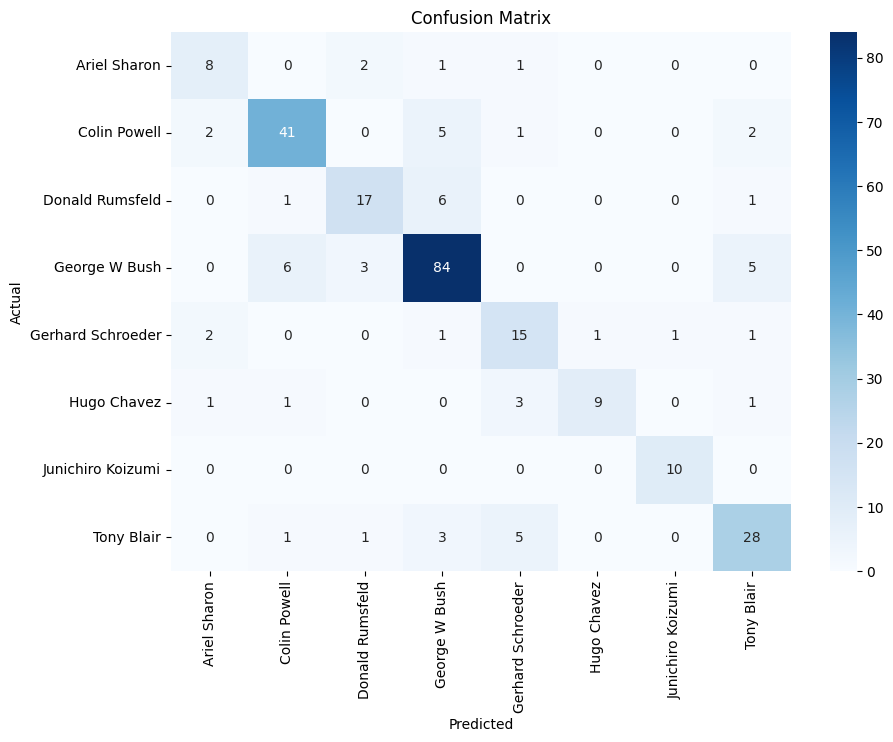

In [ ]:
#SVC
matrix = confusion_matrix(y_test, prediccion[0][1])
print("\nMatriz de confusión:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpreting the results obtained, what was the performance of PCA and the SML models? How do you think the performance could be improved?

Note: Metrics are expected to be between 0.65 to 0.85.

RESPUESTA: Applying the PCA technique without standardization gave me a result of accuracy within the parameters of the grade, the performance improved only slightly when the standardization or scaling of the data was done giving the result of: {'SVC': {'accuracy': 0.7851851851851852}, 'KNN': {'accuracy': 0.5592592592592592}}

---

### Parte B

* Apply LDA
* Apply SVM, KNN on the data obtained from LDA (use the same configurations)
* Obtain the confusion matrix from SVM and KNN
* Interpret the results
Interpret the difference between what was obtained using PCA and LDA values * Interpret the difference between PCA and LDA values

In [ ]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Applying LDA
n_components = min(150, len(target_names)-1)  #  We ensure that you do not exceed the limit
lda = LDA(n_components=n_components)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
#Training
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [ ]:
#models
modelos = {
    "SVC" : SVC(kernel='linear', C=1.0, random_state=42), #SOFT
    "KNN" : KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
#Evaluating
results = {}
prediccion = []
for name, model in modelos.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    prediccion.append((name, y_pred))

    train_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy
        #'train_time': train_time,
        #'report': classification_report(y_test, y_pred, target_names=target_names)
    }

In [ ]:
#resultados
print(results)

{'SVC': {'accuracy': 0.9962962962962963}, 'KNN': {'accuracy': 0.9962962962962963}}



Matriz de confusión:


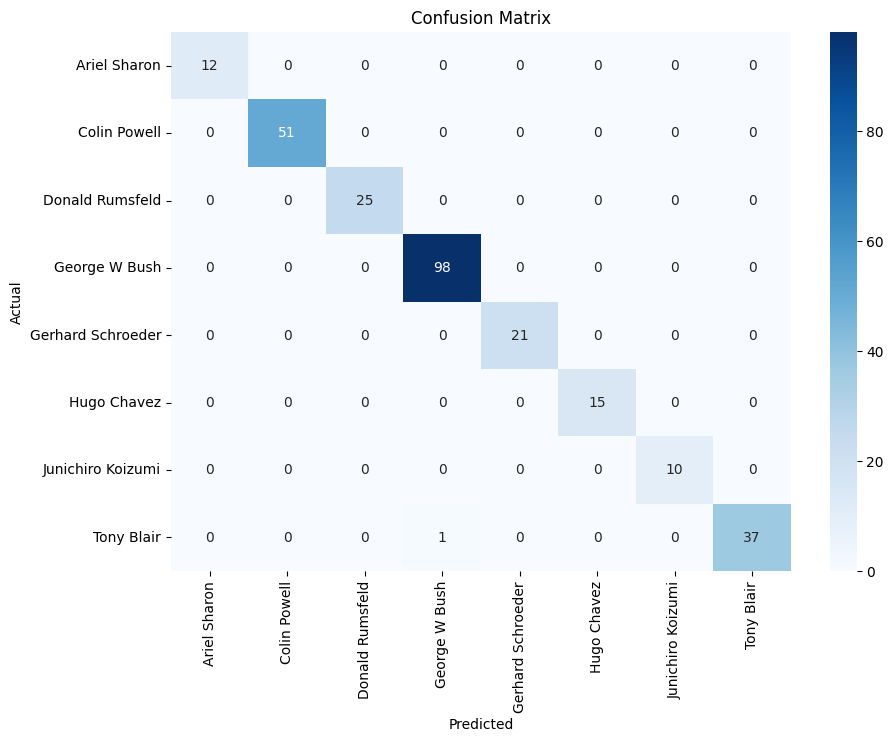

In [ ]:
#matriz de confusion
# KNN
matrix = confusion_matrix(y_test, prediccion[1][1])
print("\nMatriz de confusión:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Matriz de confusión:


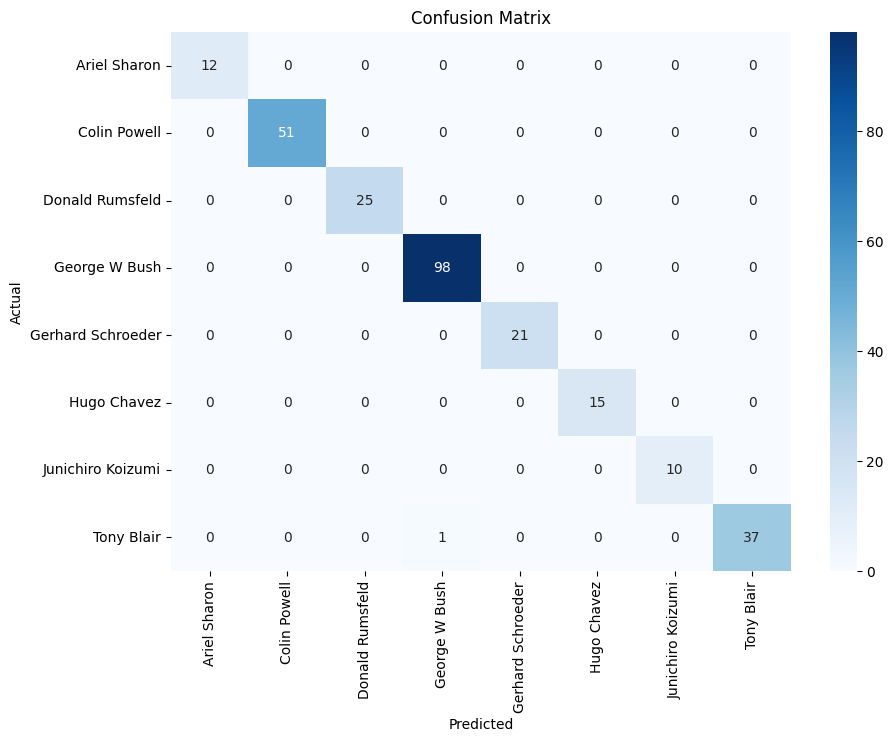

In [ ]:
#SVC
matrix = confusion_matrix(y_test, prediccion[0][1])
print("\nMatriz de confusión:")
plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparison and interpretation

PCA and LDA values obtained:


*   PCA:  {'SVC': {'accuracy': 0.7851851851851852}, 'KNN': {'accuracy': 0.5592592592592592}}
*   LDA: {'SVC': {'accuracy': 0.9962962962962963}, 'KNN': {'accuracy': 0.9962962962962963}}



**INTERPRETATION:**


* The results show a better separation of classes between classes than using PCA.
* Accuracy improved too much, because we have the labels available.
* LDA is a computationally more complex model taking more time.



**BY: GUSTAVO RUIZ**